In [43]:
library(tidyverse)
library(tidymodels)
library(cowplot)

In [44]:
url <- "https://raw.githubusercontent.com/reddyprasade/Machine-Learning-Problems-DataSets/master/Classification/School%20Grades/school_grades_dataset.csv"
math = read_csv(url)

Rows: 649 Columns: 33
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (17): school, sex, address, famsize, Pstatus, Mjob, Fjob, reason, guardi...
dbl (16): age, Medu, Fedu, traveltime, studytime, failures, famrel, freetime...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [45]:
# Separating data into training and testing sets
math <- math |>  
        mutate(standing = ifelse(G3 > 10, "pass", "fail")) |>
        mutate(sex = as_factor(sex), G3 = as_factor(G3), standing) |>
        mutate(sex = fct_recode(sex, "Male" = "M", "Female" = "F"))
head(math)

math_split <- initial_split(math, prop = 0.75, strata = G3)
math_training <- training(math_split)
math_testing <- testing(math_split)

school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,⋯,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,standing
<chr>,<fct>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
GP,Female,18,U,GT3,A,4,4,at_home,teacher,⋯,3,4,1,1,3,4,0,11,11,pass
GP,Female,17,U,GT3,T,1,1,at_home,other,⋯,3,3,1,1,3,2,9,11,11,pass
GP,Female,15,U,LE3,T,1,1,at_home,other,⋯,3,2,2,3,3,6,12,13,12,pass
GP,Female,15,U,GT3,T,4,2,health,services,⋯,2,2,1,1,5,0,14,14,14,pass
GP,Female,16,U,GT3,T,3,3,other,other,⋯,3,2,1,2,5,0,11,13,13,pass
GP,Male,16,U,LE3,T,4,3,services,other,⋯,4,2,1,2,5,6,12,12,13,pass


G3,count
<fct>,<int>
0,12
5,1
7,9
8,26
9,28
10,69
11,77
12,50
13,63


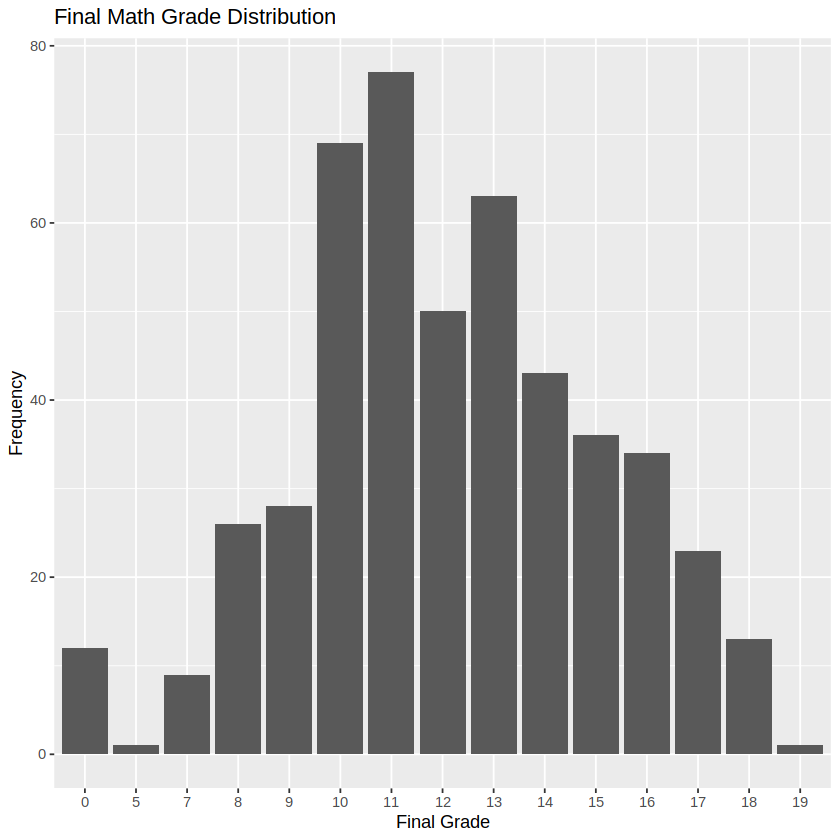

In [46]:
grade_distribution <- math_training |>
             group_by(G3) |>
             summarize(count = n())
grade_distribution
grade_bar <- grade_distribution |>
             ggplot(aes(x = G3, y = count)) +
             geom_bar(stat = "identity") +
             labs(x = "Final Grade", y = "Frequency") +
             ggtitle("Final Math Grade Distribution")
grade_bar

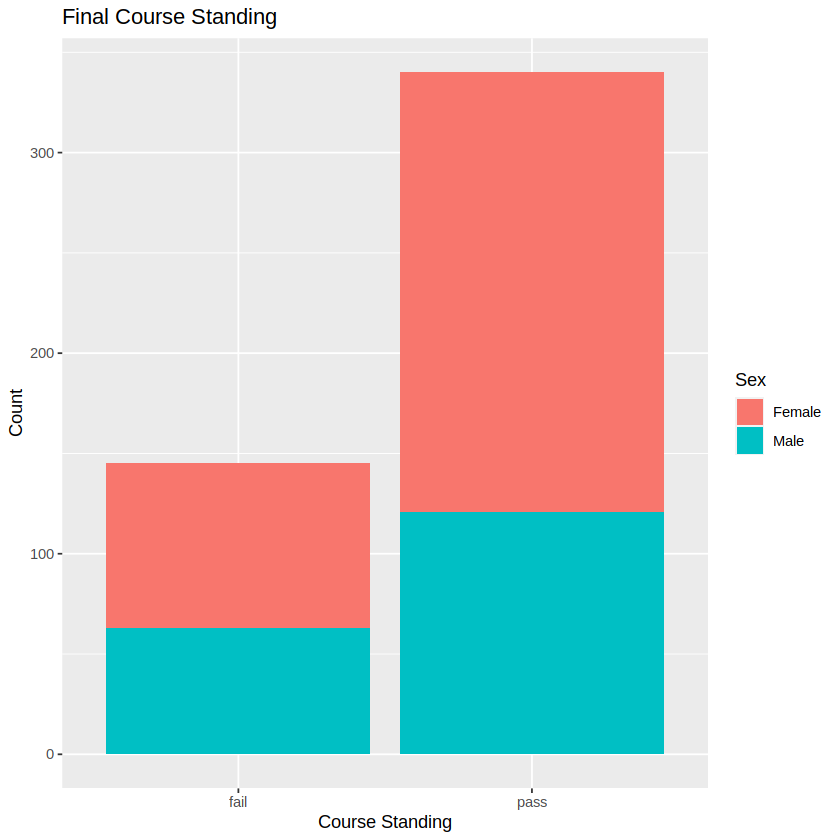

In [47]:
pass_plot <- math_training |>
            ggplot(aes(x = standing, fill = sex)) +
            geom_bar() +
            labs(x = "Course Standing", y = "Count", fill = "Sex") +
            ggtitle("Final Course Standing")
pass_plot

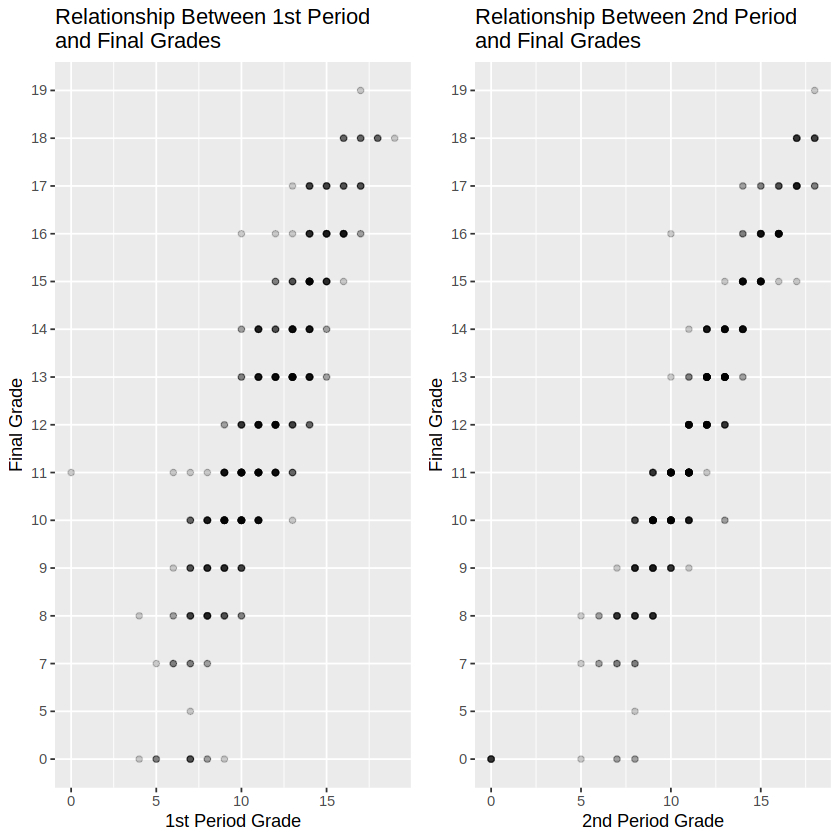

In [48]:
G1_G3_scatterplot <- math_training |>
                    ggplot(aes(x = G1, y = G3)) +
                    geom_point(alpha = 0.2) +
                    labs(x = "1st Period Grade", y = "Final Grade") +
                    ggtitle("Relationship Between 1st Period\nand Final Grades")

G2_G3_scatterplot <- math_training |>
                    ggplot(aes(x = G2, y = G3)) +
                    geom_point(alpha = 0.2) +
                    labs(x = "2nd Period Grade", y = "Final Grade") +
                    ggtitle("Relationship Between 2nd Period\nand Final Grades")

plot_grid(G1_G3_scatterplot, G2_G3_scatterplot)

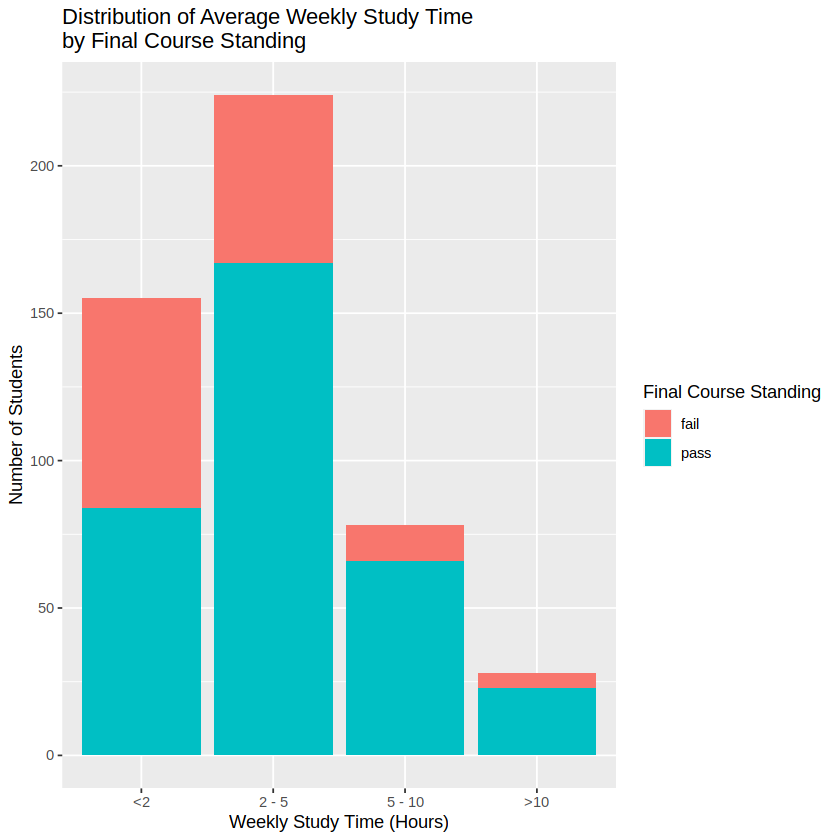

In [56]:
studytime_vs_grade_plot <- math_training |>
        mutate(studytime = as_factor(studytime)) |>
        mutate(studytime = fct_recode(studytime, "<2" = "1", "2 - 5" = "2", "5 - 10" = "3", ">10" = "4")) |>
        ggplot(aes(x = studytime, fill = standing)) +
        geom_bar() +
        labs(x = "Weekly Study Time (Hours)", y = "Number of Students", fill = "Final Course Standing") +
        ggtitle("Distribution of Average Weekly Study Time\nby Final Course Standing")
studytime_vs_grade_plot

**What do you expect to find?**

We want to find student achievement in Mathematics from the two Portuguese schools in the data given. For each student, this data set includes variables that could potentially affect course performance, such as relationships, health, commute time, weekly study time, and parent occupations. Therefore, we look forward to finding how different combinations of these variables contribute to a student's performance in math, and which circumstances are correlated with students getting unsatisfactory grades in our exploratory analysis. 

**What impact could such findings have?**

According to the findings, we will summarize and analyze which variables will help students succeed in Mathematics. Thus, to highly improve those good aspects and minimize the variables that will decrease students’ grades. Finally, to achieve the goal that of improving all of the students’ Mathematics grades in the two Portuguese schools. 

**What future questions could this lead to?**

In the future, we could predict whether the students with good grades in Mathematics and Portuguese have the same habits and traits. We could also compare the results of student achievement in Portuguese with the results in Mathematics to see if there's a correlation between good grades in one subject and good grades in the other. We could also figure out common study patterns in good students to make study tips to recommend students to follow in order to get good grades in those two subjects.
